<a href="https://colab.research.google.com/github/Devcoding17/Cookbook/blob/master/IAC_Project_Dev_Parmar_(Data_Analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Analytics Project
##### Cloud Counselage Pvt.Ltd,Mumbai, Maharashtra.
##### Intern Name: DEV PARMAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_excel('Data.csv.xlsx')
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


#### 1.How many unique students are included in dataset ??


In [4]:
num_rows = df.shape[0]
print("unique students are included in a dataset:", num_rows)


unique students are included in a dataset: 4894


#### 2.What is average CGPA of the Students?

In [14]:
column_name = 'CGPA'
mean = df[column_name].mean()
print(" Average CGPA of Sudents:", mean)


 Average CGPA  of Sudents: 8.038475684511647


#### 3.What is distribution of Students across different Graduation years?

In [ ]:
graduation_year= df.groupby(['Graduation']).size().reset_index()
print(graduation_year)

   Graduation     0
0        2023  1536
1        2024  1511
2        2025  1292
3        2026   555


#### 4.What is distribution of Students experienced with Python Programming?

In [61]:
python_experience_counts = df['Experience with python (Months)'].value_counts().reset_index()
print("Distribution of student's experiemced with Python Programming:")
print(python_experience_counts)

Distribution of student's experiemced with Python Programming:
   Experience with python (Months)  count
0                                5   1242
1                                3   1008
2                                8    800
3                                6    738
4                                7    640
5                                4    466


#### 5.What is the average family income of the student?

In [63]:
import pandas as pd
# pd.set_option('future.no_silent_downcasting', True)
income_mapping = {
    '0-2 Lakh': 2,
    '7 Lakh+': 8,
    '5-7 Lakh': 7,
    '2-5 Lakh': 5
}
df['Family Income'] = df['Family Income'].replace(income_mapping).infer_objects(copy=False)
average_income = df['Family Income'].mean()
print("Average Family Income:", average_income)

Average Family Income: nan


#### 6.How does GPA vary among different colleges?(Show top 5 colleges)

In [62]:
college_gpa = df.groupby('College Name')['CGPA'].mean()
top_colleges = college_gpa.sort_values(ascending=False).head(5).reset_index()
print(top_colleges)

                                        College Name      CGPA
0  THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER...  8.585714
1                               St Xavier's College   8.578571
2  B. K. Birla College of Arts, Science & Commerc...  8.456410
3            Symbiosis Institute of Technology, Pune  8.303448
4                   AP SHAH INSTITUTE OF TECHNOLOGY   8.283333


#### 7.Are there any outliers in the quantity (number of courses completed) attribute?


In [57]:
course_counts = df['Events'].value_counts()
Q1 = course_counts.quantile(0.25)
Q3 = course_counts.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = course_counts[(course_counts < lower_bound) | (course_counts > upper_bound)]
print("Outliers in Quantity Obtained (Number of Students Taking Each Course):")
print(outliers)

Outliers in Quantity Obtained (Number of Students Taking Each Course):
Events
Product Design & Full Stack    842
Name: count, dtype: int64


In [ ]:
df.columns

Index(['Name', 'Email ID', 'Quantity', 'Events', 'AttendeeStatus', 'college',
       'How did you come to know about this event?', 'KnowsEvent',
       'Designation', 'Graduation', 'City', 'GPA', 'PythonExperience',
       'FamilyIncome', 'SalaryExpectation', 'LeadershipSkills',
       'Family Income'],
      dtype='object')

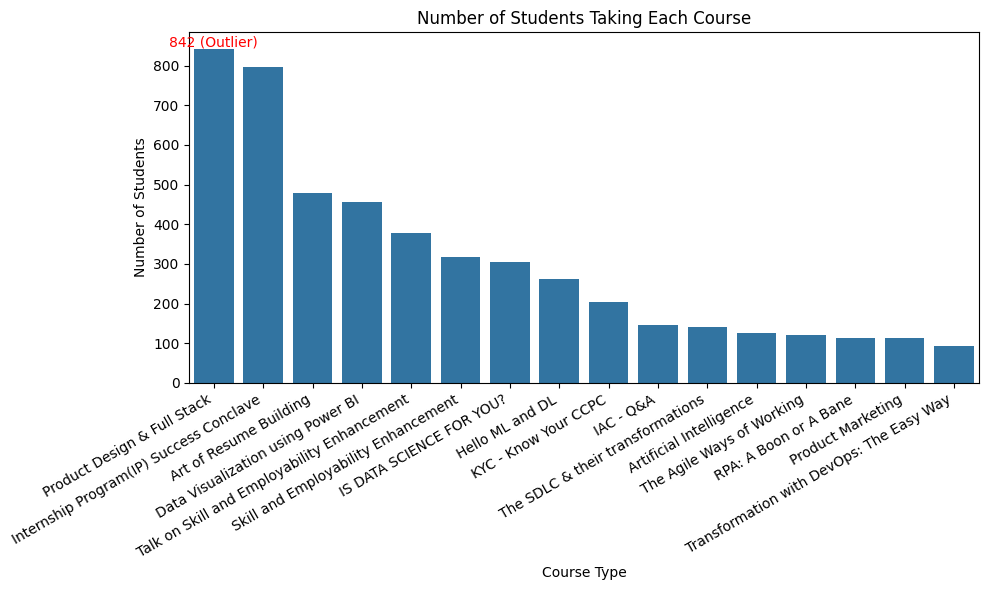

In [59]:

course_counts = df['Events'].value_counts()

# ... (rest of your plotting code)

plt.figure(figsize=(10, 6))
sns.barplot(x=course_counts.index, y=course_counts.values)
plt.xlabel('Course Type')
plt.ylabel('Number of Students')
plt.title('Number of Students Taking Each Course')
plt.xticks(rotation=45)

for i in outliers.index:
    plt.text(course_counts.index.get_loc(i), course_counts.loc[i], f'{course_counts.loc[i]} (Outlier)', color='red', ha='center', va='bottom')

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

#### 8.What is average GPA of students from each cities ?

In [21]:
average_gpa_by_city = df.groupby('City')['CGPA'].mean().reset_index()
print(average_gpa_by_city)

          City      CGPA
0     Agartala  7.660714
1         Agra  8.046429
2    Ahemdabad  8.190385
3        Ajmer  8.284314
4        Akola  8.021429
..         ...       ...
172    Vidisha  7.738095
173  Vijaywada  7.986364
174     Wardha  8.328571
175     konark  8.071429
176      kullu  7.878571

[177 rows x 2 columns]


#### 9.Can we identify any relationship between family income and GPA?

<Axes: xlabel='Family Income', ylabel='CGPA'>

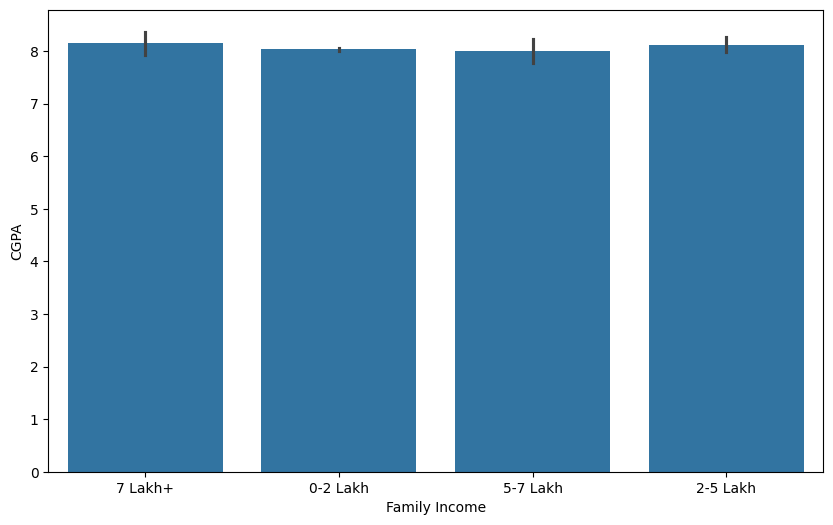

In [25]:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='FamilyIncome', y='GPA', data=df)
# plt.xlabel('Family Income')
# plt.ylabel('GPA')
# plt.title('Family Income vs. GPA')
# plt.show()
plt.rcParams['figure.figsize']=(10,6)
sns.barplot(x='Family Income',y='CGPA',data=df)


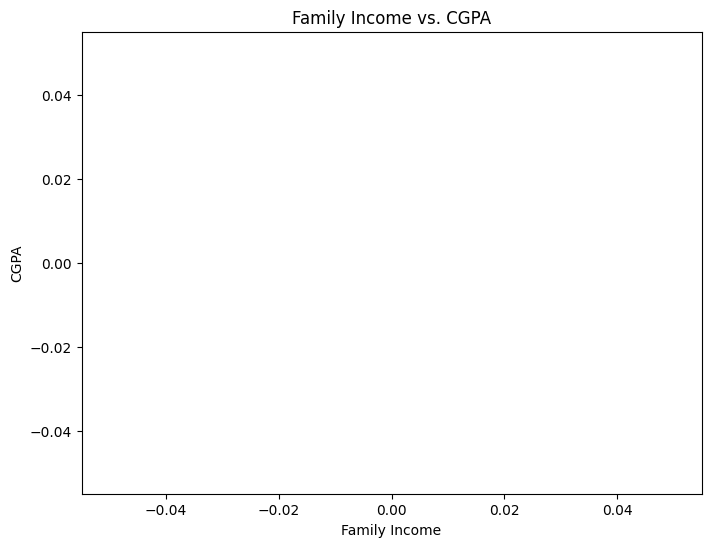

Correlation Coefficient: nan


In [49]:
df['Family Income'] = df['Family Income'].replace(income_mapping).astype(float)

plt.figure(figsize=(8, 6))
sns.regplot(x='Family Income', y='CGPA', data=df)
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.title('Family Income vs. CGPA')
plt.show()

correlation_coefficient = df['Family Income'].corr(df['CGPA'])
print("Correlation Coefficient:", correlation_coefficient)


#### 10.How many Students from various cities?(using Data visualizaton Tool)

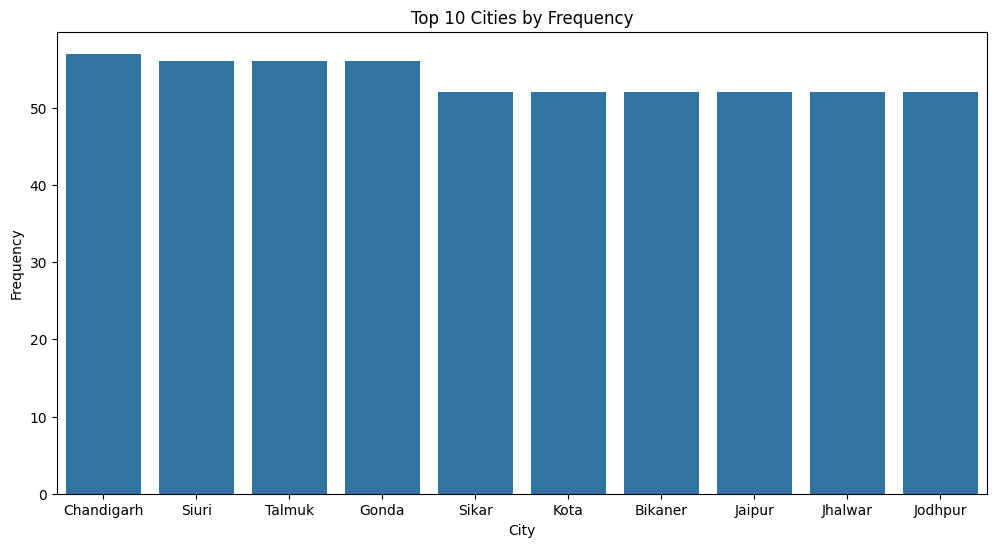

In [26]:
city_counts = df['City'].value_counts()
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ['City', 'Frequency']
top_10_various_cities=city_counts_df.head(10)
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x='City',y='Frequency',data=top_10_various_cities)
plt.title('Top 10 Cities by Frequency')
plt.show()


#### 11.How does the expected salary vary based on factors like CGPA,family Income, months of experience in python language?

<Axes: xlabel='CGPA', ylabel='Expected salary (Lac)'>

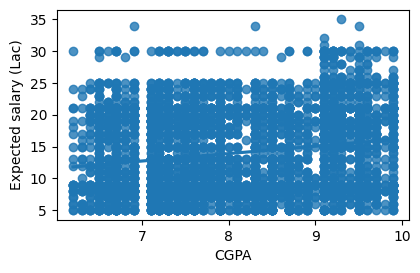

In [46]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Replace non-numeric values with NaN
df['Family Income'] = pd.to_numeric(df['Family Income'], errors='coerce')

# Now you can safely convert the column to float
df['Family Income'] = df['Family Income'].astype(float)

# Continue with your plotting code
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.regplot(x='CGPA', y='Expected salary (Lac)', data=df)


#### 12.Which event tend to atracts more students for specific field of study?
Answer->Product Design and Full Stack : 842

#### 13. Do students who are having leadership positions during their college years tend to have higher GPAs or better expected salary?

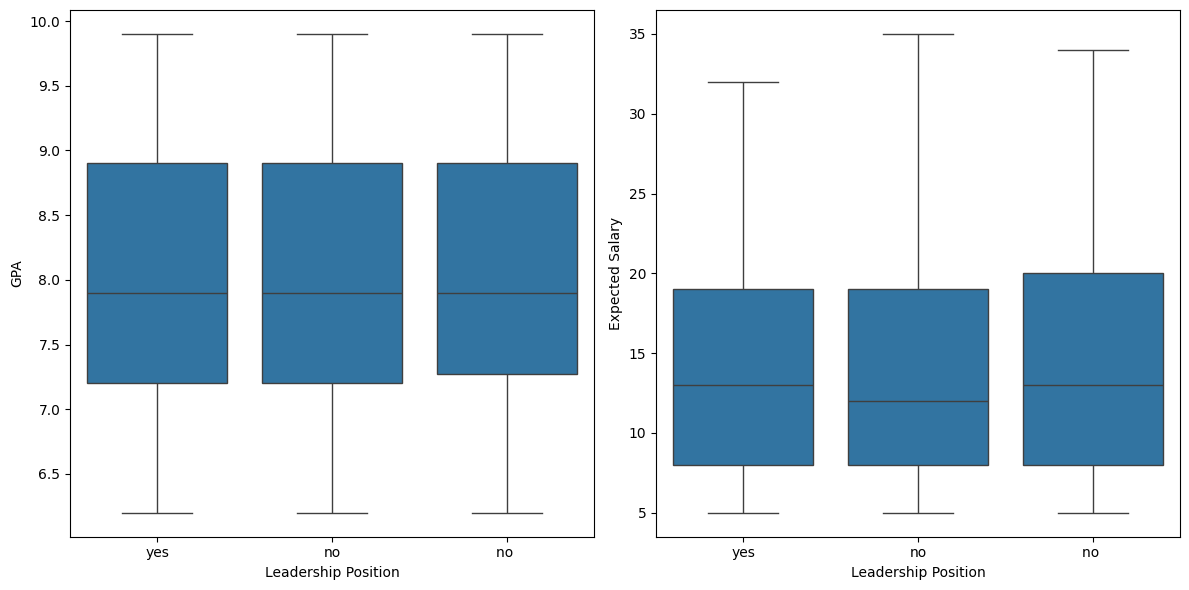

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Leadership- skills', y='CGPA', data=df)
plt.xlabel('Leadership Position')
plt.ylabel('GPA')

plt.subplot(1, 2, 2)
sns.boxplot(x='Leadership- skills', y='Expected salary (Lac)', data=df)
plt.xlabel('Leadership Position')
plt.ylabel('Expected Salary')
plt.tight_layout()
plt.show()

#### 15.how many students are graduating by the end of 2024?

In [36]:
students_graduating_2024 = df[df['Year of Graduation'] <= 2024]
number_of_students_graduating_2024 = len(students_graduating_2024)
print(f"Number of students graduating by the end of 2024: {number_of_students_graduating_2024}")

Number of students graduating by the end of 2024: 3047


#### 16.Which marketing effects better in gaining attention from the students?

In [37]:
social_media_counts = df['How did you come to know about this event?'].value_counts()
top_10_social_media = social_media_counts.head(10).reset_index()
print(top_10_social_media)

  How did you come to know about this event?  count
0                                   Whatsapp   1067
1                                      Email    438
2                    SPOC/ College Professor    326
3                                     Others    153
4                   Cloud Counselage Website    129
5         Whatsapp | SPOC/ College Professor     67
6                                   LinkedIn     55
7                                   Facebook     48
8                                    Youtube     37
9                          Friend/ Classmate     30


#### 17. Find the total number of students who attended the events related to Data Science.

In [41]:
Data_science_attendees = df[df['Events'] == 'IS DATA SCIENCE FOR YOU?']
number_of_attendees = len(Data_science_attendees)
print("Total number of students who attended the Data Science events is:", number_of_attendees)

Total number of students who attended the Data Science events is: 306


#### 18. How many students know about the event from their colleges? Mention top 5 colleges for it.

In [44]:
students_know_events = df[df['Events'] == True]
number_of_students_know_events = students_know_events.shape[1]
print(f"Number of students who know about the events from their colleges: {number_of_students_know_events}")

Number of students who know about the events from their colleges: 16


#### 19. What is the average expected salary of students having more than 8.5 cgpa or having experience in python greater than 2 months?

In [45]:
filtered_data = df[df['CGPA'] > 8.5]
average_salary = filtered_data['Expected salary (Lac)'].mean()
print("Average expected salary of students with CGPA > 8.5  :", average_salary)

Average expected salary of students with CGPA > 8.5  : 15.685150955021564


In [ ]:
filtered_data = df[df['PythonExperience'] > 2]
average_salary = filtered_data['SalaryExpectation'].mean()
print("Average expected salary of students with Python experience > 2 months  :", average_salary)

Average expected salary of students with Python experience > 2 months  : 13.935635472006538
